In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student.csv')

In [3]:
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
                       'Sports_activity', 'Transportation', 'Attendance',
                       'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

In [4]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [5]:
X = df.drop(['Id', 'Grade'], axis=1)
y = df['Grade']


In [6]:
y = le.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
y_pred = dt_model.predict(X_test)

In [10]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred,
                            target_names=le.classes_))

Decision Tree Classification Report:
              precision    recall  f1-score   support

          AA       0.12      0.33      0.18         3
          BA       0.17      0.25      0.20         4
          BB       0.25      0.17      0.20         6
          CB       0.50      0.33      0.40         3
          CC       1.00      0.33      0.50         3
          DC       0.00      0.00      0.00         4
          DD       0.33      1.00      0.50         2
        Fail       0.50      0.25      0.33         4

    accuracy                           0.28        29
   macro avg       0.36      0.33      0.29        29
weighted avg       0.33      0.28      0.26        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


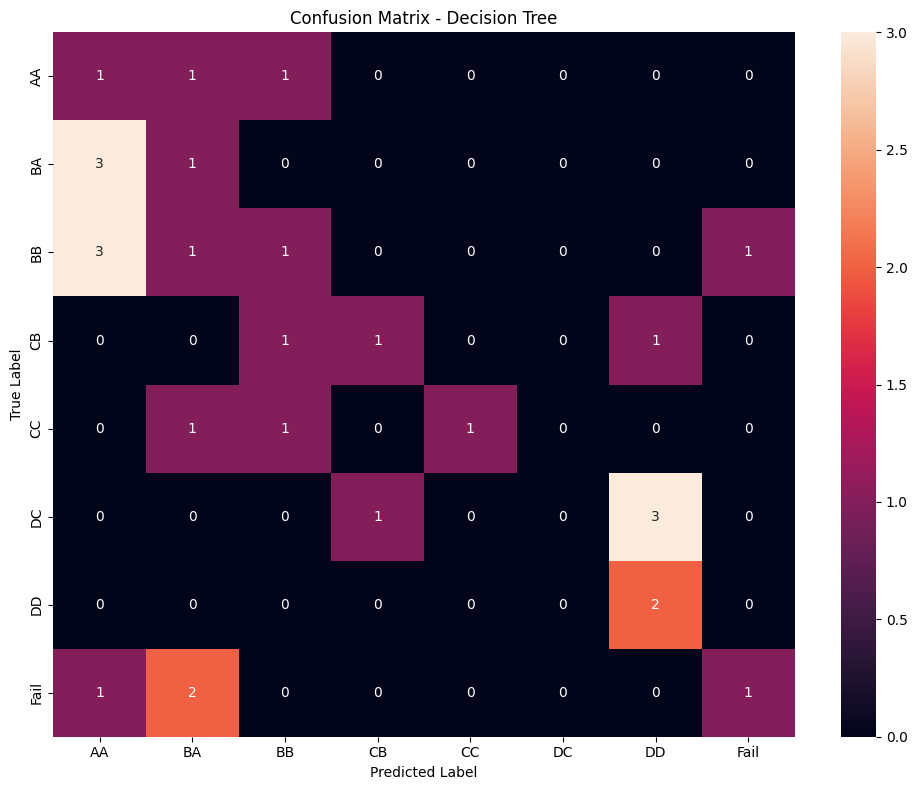

In [11]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

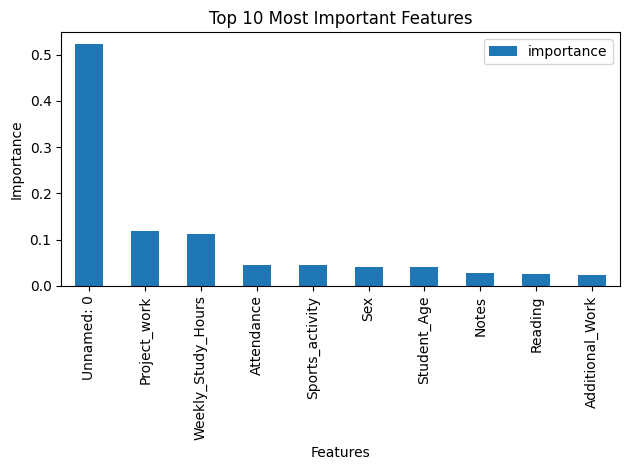

In [12]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(x='feature', y='importance', kind='bar')
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()





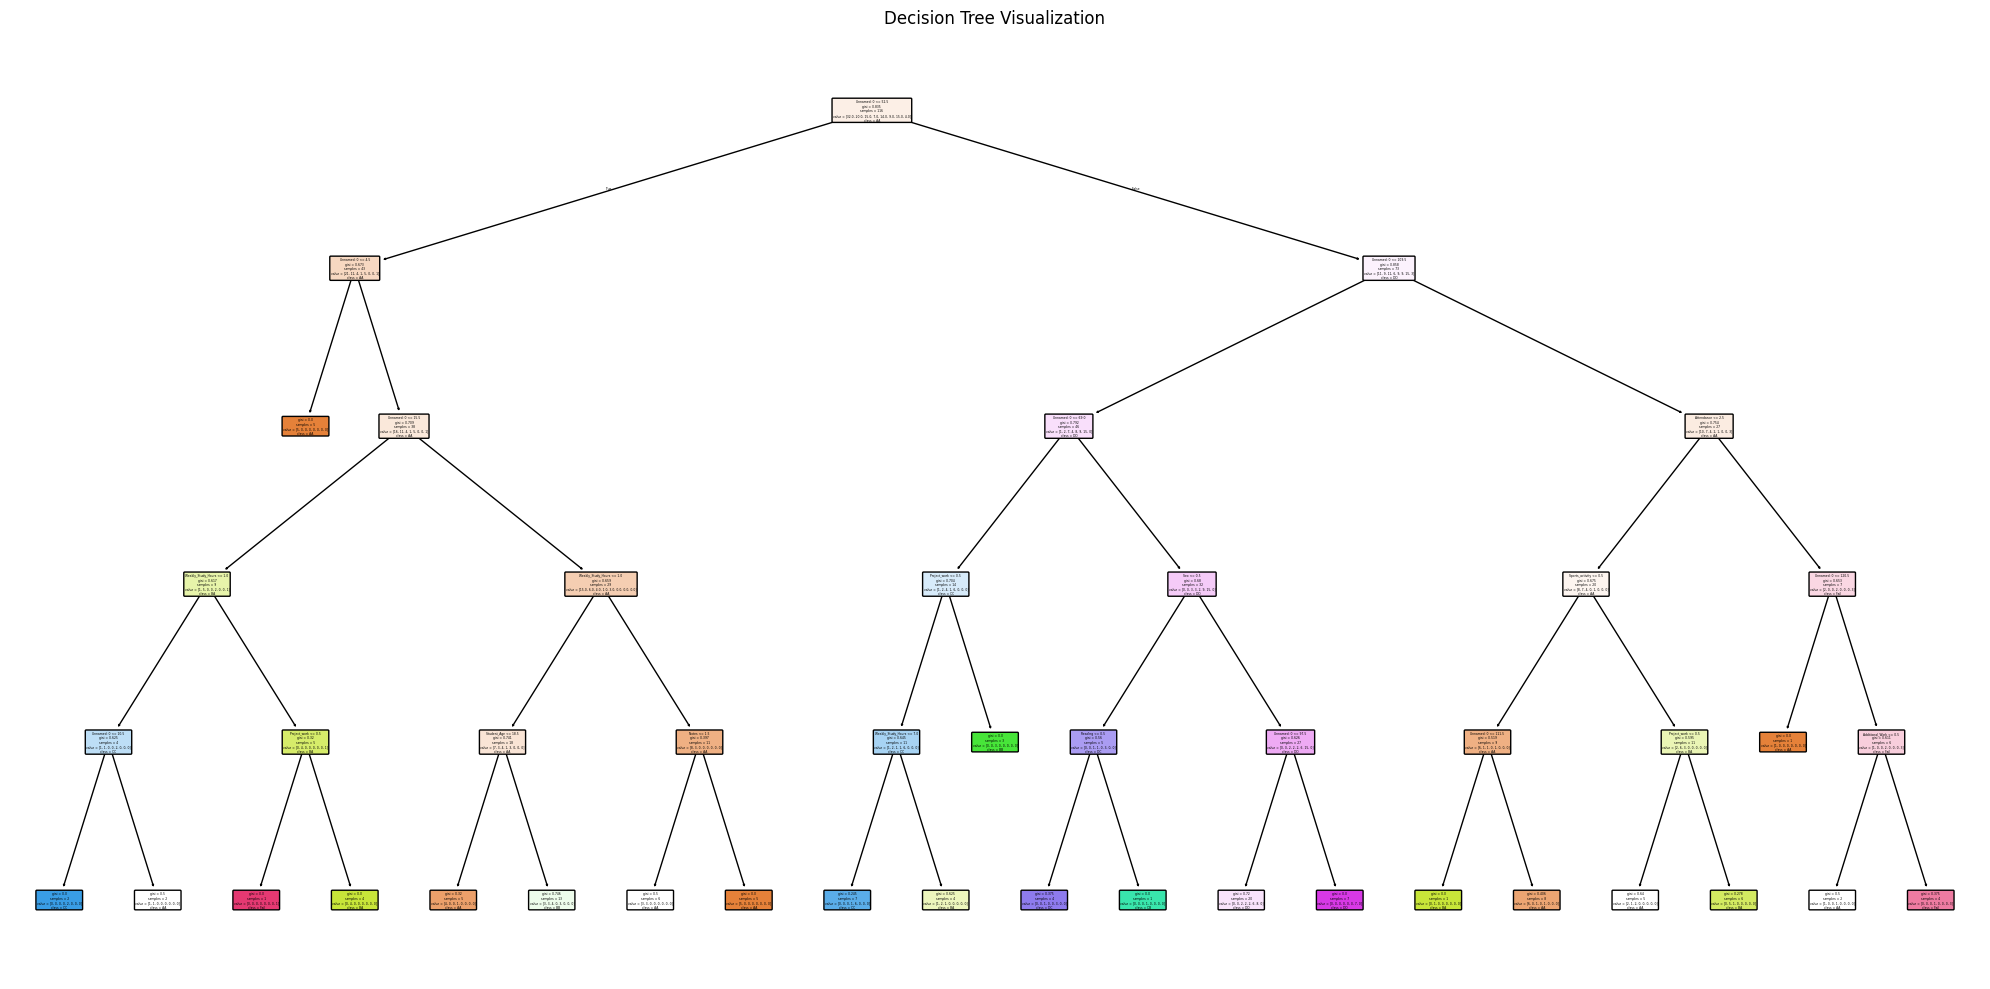


Top 10 Most Important Features:
               feature  importance
0           Unnamed: 0    0.522285
13        Project_work    0.118825
8   Weekly_Study_Hours    0.112803
9           Attendance    0.045190
6      Sports_activity    0.044972
2                  Sex    0.040515
1          Student_Age    0.040120
11               Notes    0.026805
10             Reading    0.025554
5      Additional_Work    0.022933


In [13]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns,
          class_names=le.classes_,
          filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))